## 改值处理法

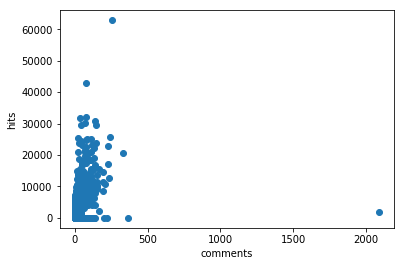

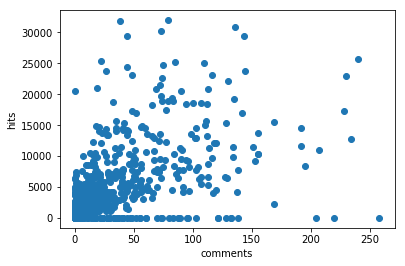

In [1]:
import pandas as pda
import pymysql
import matplotlib.pylab as pyl

'''改值处理法'''
conn = pymysql.connect(host='127.0.0.1', user='root', passwd='root', db='hexun')
sql = 'select * from myhexun'
data = pda.read_sql(sql, conn)

# 转制
data2 = data.T
# 评论数
comment_num = data2.values[4]
# 点击量
hit_num = data2.values[3]

pyl.xlabel('comments')
pyl.ylabel('hits')
pyl.plot(comment_num, hit_num, 'o')
pyl.show()

line = len(data.values)
col = len(data.values[0])
da = data.values
for i in range(0, line):
    try:
        if da[i][4] > 300:
            da[i][4] = 0
        elif da[i][3] > 40000:
            da[i][3] = 2
    except Exception as err:
            print(err)

da2 = da.T
com_num = da2[4]
h_num = da2[3]
pyl.xlabel('comments')
pyl.ylabel('hits')
pyl.plot(com_num, h_num, 'o')
pyl.show()

## 删除处理法
  
遇到异常行，跳过  
正常，添加到新数组中  

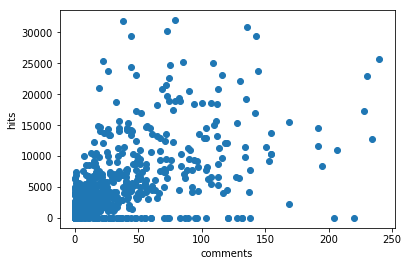

In [2]:
import numpy as npy
da = data.values
'''删除处理法'''
x = 0
for i in range(0, line):
    if da[i][4] > 300:
        continue
    elif da[i][3] > 40000:
        continue
    else:
        if x == 0:
            newda = da[i]
        else:
            newda = npy.row_stack((newda, da[i]))
        x += 1
da2 = newda.T
com_num = da2[4]
h_num = da2[3]
pyl.xlabel('comments')
pyl.ylabel('hits')
pyl.plot(com_num, h_num, 'o')
pyl.show()

In [ ]:
da2 = newda.T
com_max = da2[4].max()
com_min = da2[4].min()
hit_max = da2[3].max()
hit_min = da2[3].min()

# 极差
com_rg = com_max - com_min
hit_rg = hit_max - hit_min
# 组距
com_dst = com_rg / 5
hit_dst = hit_rg / 5
# 绘制评论直方图
com_sty = npy.arange(com_min, com_max, com_dst)
pyl.hist(da2[4], com_sty)
pyl.show()
